In [ ]:
# Set the image folder directory
image_folder = "data"
batch_size = 128
image_size = 64
stats = (0.5,0.5,0.5),(0.5,0.5,0.5)
workers = 2
# Number of channels in the training images. For color images this is 3
nc = 3
# Size of z latent vector (i.e. size of generator input)
nz = 100
# Size of feature maps in generator
ngf = 64
# Size of feature maps in discriminator
ndf = 64
# Number of training epochs
num_epochs = 25
# Learning rate for optimizers
lr = 0.0002
# Beta1 hyperparameter for Adam optimizers
beta1 = 0.5
# Number of GPUs available. Use 0 for CPU mode.
ngpu = 1

In [100]:
import torch.nn as nn

class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.layers = nn.Sequential(
            # input is ``3 x 64 x 64``
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``64 x 32 x 32``
            nn.Conv2d(64, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 2),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(128) x 16 x 16``
            nn.Conv2d(64 * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(64*4) x 8 x 8``
            nn.Conv2d(ndf * 4, 64 * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.LeakyReLU(0.2, inplace=True),
            # state size. ``(ndf*8) x 4 x 4``
            nn.Conv2d(64 * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.layers(input)

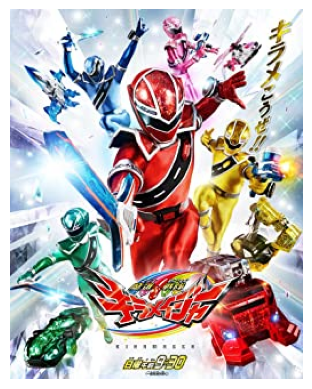

In [101]:
import torch
import torchvision.transforms as transforms
from PIL import Image

# Load the saved weights
weights_path = 'discriminator.pth'
weights = torch.load(weights_path)

# Create an instance of your discriminator model
discriminator = Discriminator(ngpu)  # Replace `ngpu` with the number of GPUs used in your training

# Load the weights into the discriminator model
discriminator.load_state_dict(weights)

# Set the discriminator to evaluation mode
discriminator.eval()

# Load and preprocess a sample image
image_path = 'data/action/147.jpg'
preprocess = transforms.Compose([
    transforms.Resize((image_size, image_size)),  # Resize the image to a specific size
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the image tensor
])
image = Image.open(image_path)
input_image = preprocess(image).unsqueeze(0)  # Add a batch dimension

# Pass the image through each layer of the discriminator
activations = []
for module in discriminator.layers:
    input_image = module(input_image)
    activations.append(input_image)

# Now you can analyze and visualize the obtained activations
import matplotlib.pyplot as plt

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

In [76]:
print(len(activations))

13


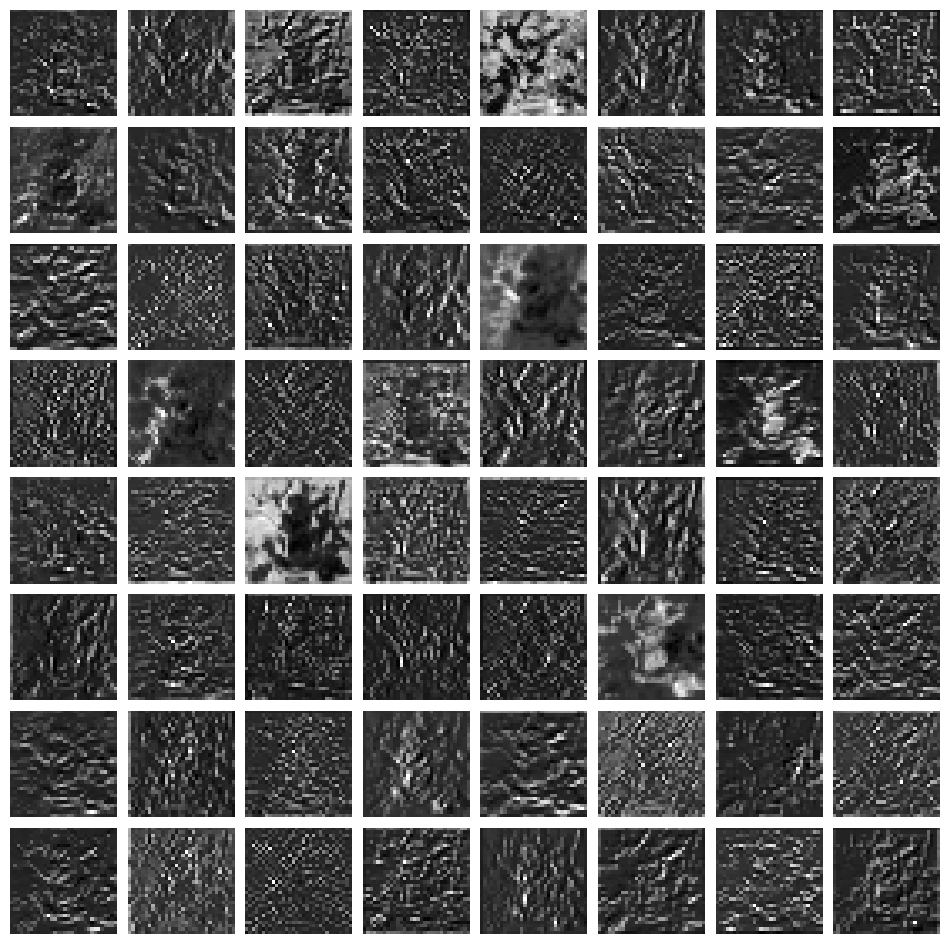

In [87]:
# First layer
activations_np = activations[0].squeeze().detach().cpu().numpy()

# Calculate the number of rows and columns in the grid
num_rows = 8
num_cols = 8

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate through the activation maps and plot them in the subplots
for i, activation_map in enumerate(activations_np):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(activation_map, cmap='gray')
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# Save image
plt.savefig("activation_map_1")
# Show the plot
plt.show()

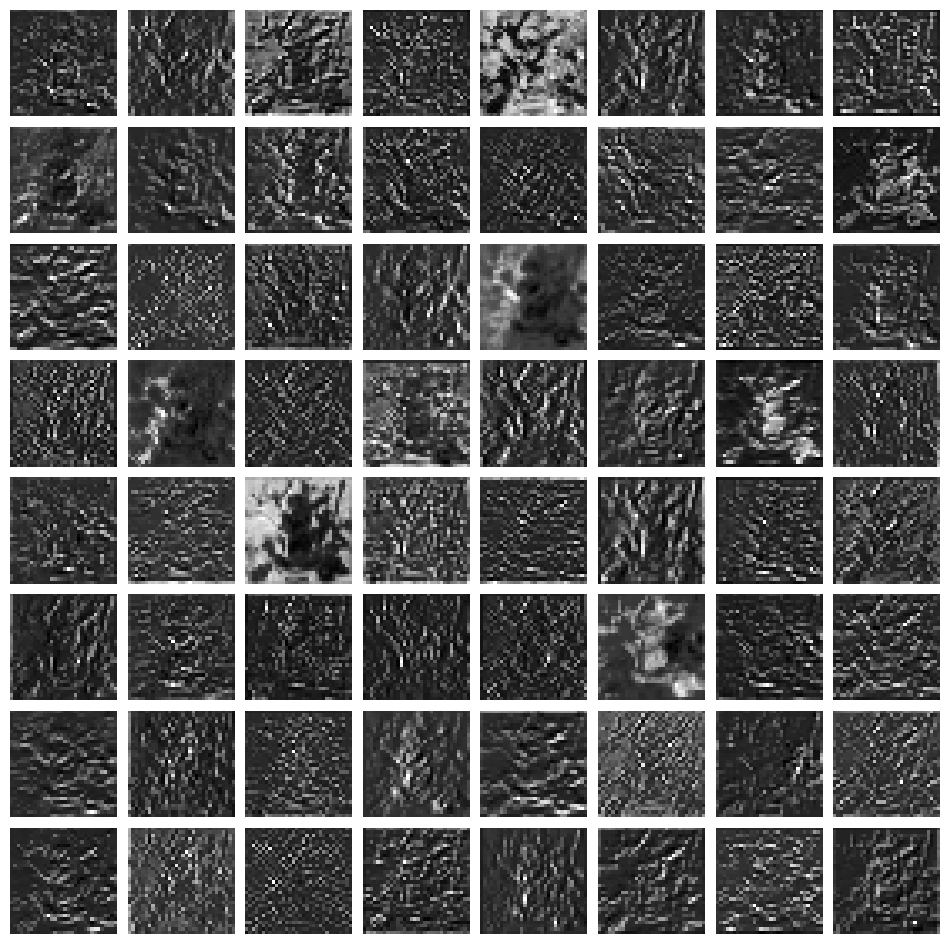

In [88]:
# Second layer
activations_np = activations[1].squeeze().detach().cpu().numpy()

# Calculate the number of rows and columns in the grid
num_rows = 8
num_cols = 8

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate through the activation maps and plot them in the subplots
for i, activation_map in enumerate(activations_np):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(activation_map, cmap='gray')
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# Save image
plt.savefig("activation_map_2")
# Show the plot
plt.show()

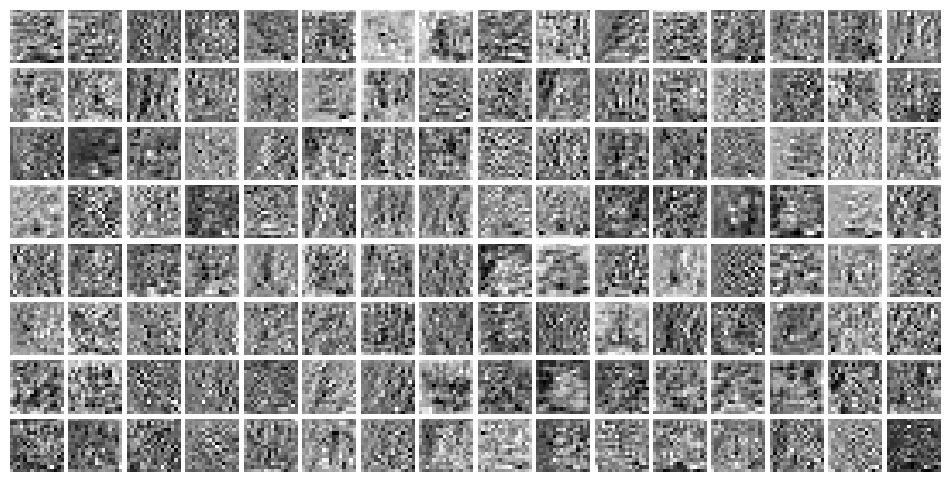

In [89]:
# Third layer
activations_np = activations[2].squeeze().detach().cpu().numpy()

# Calculate the number of rows and columns in the grid
num_rows = 8
num_cols = 16

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Iterate through the activation maps and plot them in the subplots
for i, activation_map in enumerate(activations_np):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(activation_map, cmap='gray')
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# Save image
plt.savefig("activation_map_3")
# Show the plot
plt.show()

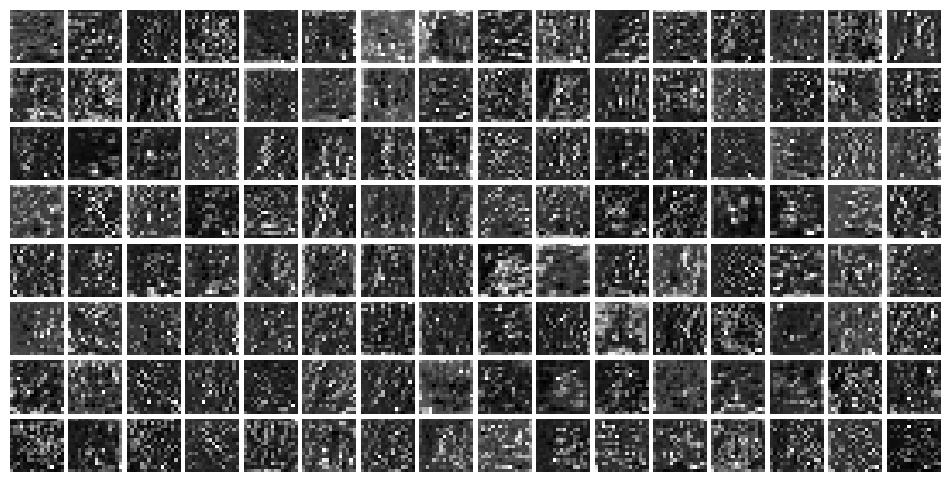

In [90]:
# Fourth layer
activations_np = activations[3].squeeze().detach().cpu().numpy()

# Calculate the number of rows and columns in the grid
num_rows = 8
num_cols = 16

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Iterate through the activation maps and plot them in the subplots
for i, activation_map in enumerate(activations_np):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(activation_map, cmap='gray')
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# Save image
plt.savefig("activation_map_4")
# Show the plot
plt.show()

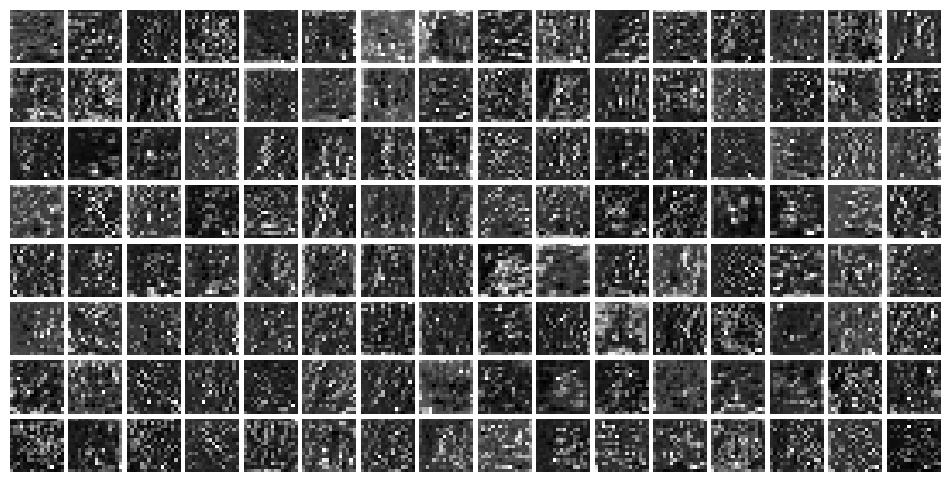

In [91]:
# Fifth layer
activations_np = activations[4].squeeze().detach().cpu().numpy()

# Calculate the number of rows and columns in the grid
num_rows = 8
num_cols = 16

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Iterate through the activation maps and plot them in the subplots
for i, activation_map in enumerate(activations_np):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(activation_map, cmap='gray')
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# Save image
plt.savefig("activation_map_5")
# Show the plot
plt.show()

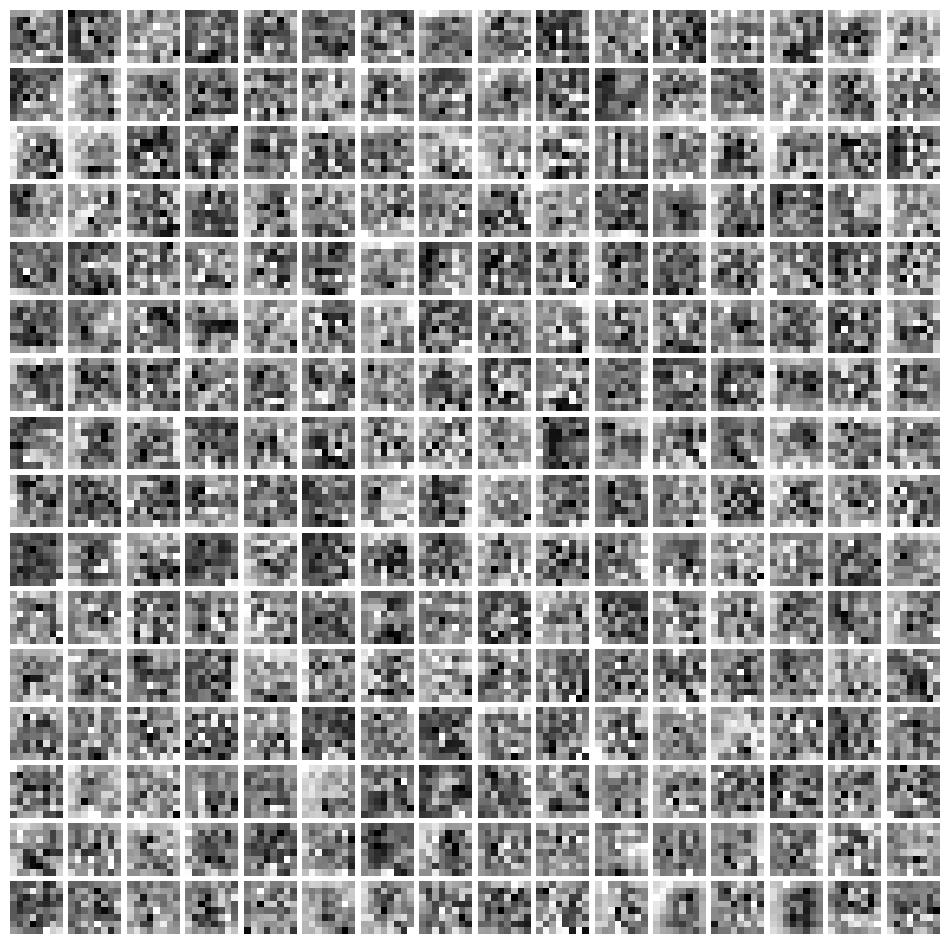

In [92]:
# Sixth layer
activations_np = activations[5].squeeze().detach().cpu().numpy()

# Calculate the number of rows and columns in the grid
num_rows = 16
num_cols = 16

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate through the activation maps and plot them in the subplots
for i, activation_map in enumerate(activations_np):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(activation_map, cmap='gray')
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# Save image
plt.savefig("activation_map_6")
# Show the plot
plt.show()

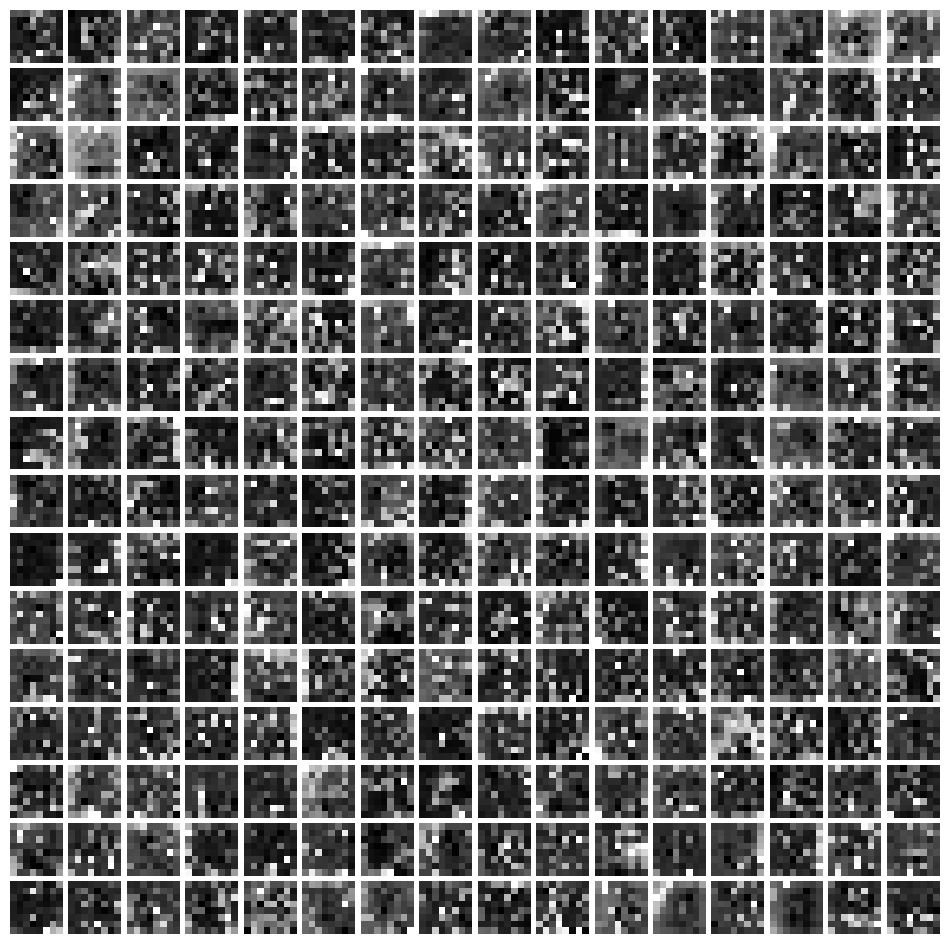

In [93]:
# Seventh layer
activations_np = activations[6].squeeze().detach().cpu().numpy()

# Calculate the number of rows and columns in the grid
num_rows = 16
num_cols = 16

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate through the activation maps and plot them in the subplots
for i, activation_map in enumerate(activations_np):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(activation_map, cmap='gray')
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# Save image
plt.savefig("activation_map_7")
# Show the plot
plt.show()

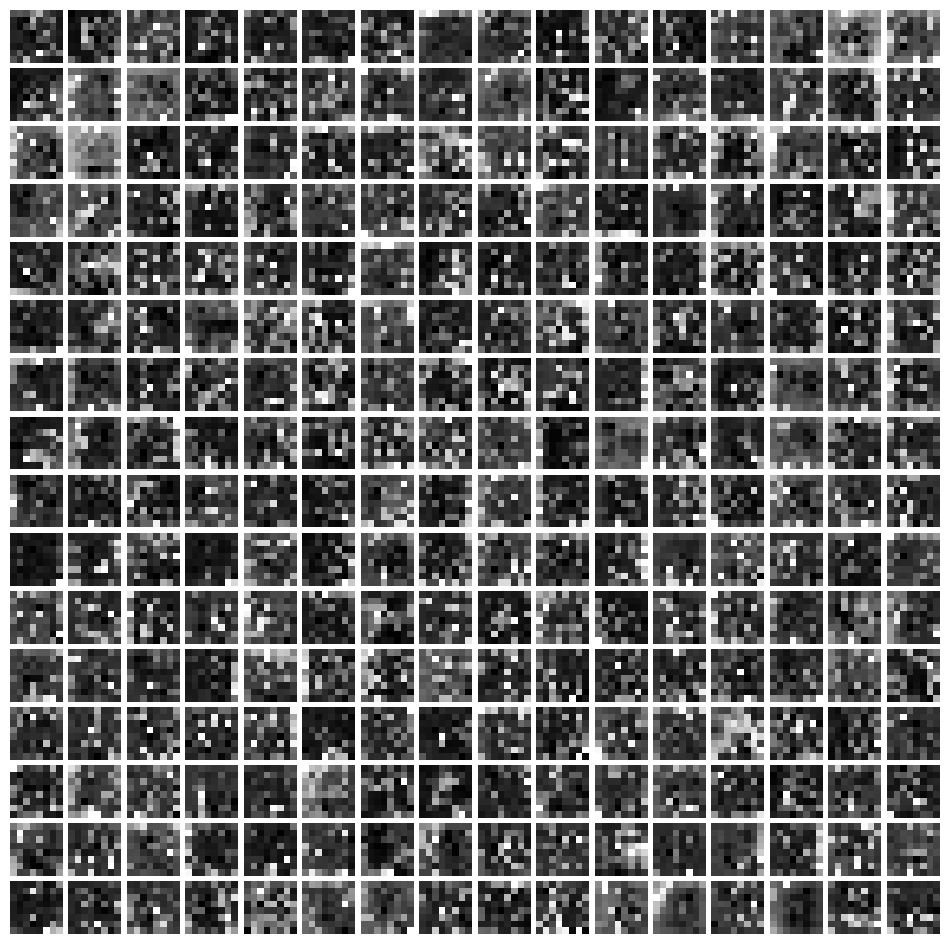

In [94]:
# Eighth layer
activations_np = activations[7].squeeze().detach().cpu().numpy()

# Calculate the number of rows and columns in the grid
num_rows = 16
num_cols = 16

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Iterate through the activation maps and plot them in the subplots
for i, activation_map in enumerate(activations_np):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(activation_map, cmap='gray')
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# Save image
plt.savefig("activation_map_8")
# Show the plot
plt.show()

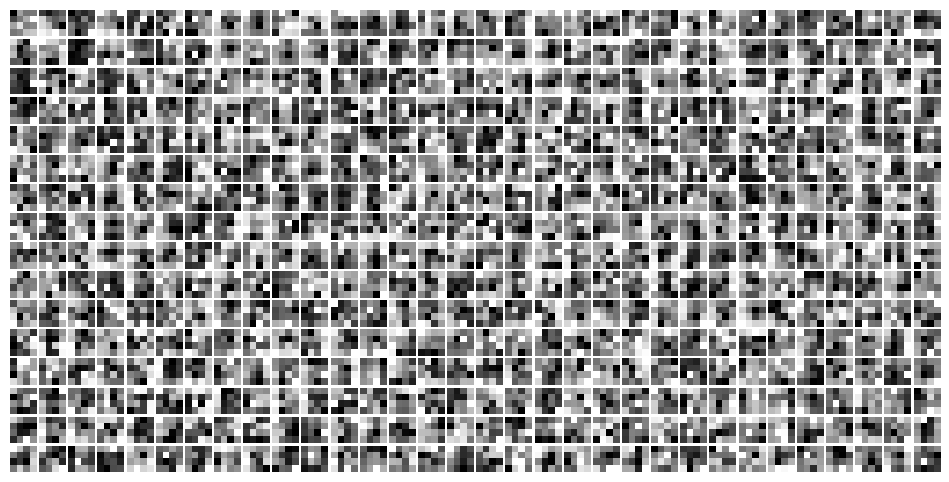

In [95]:
# Ninth layer
activations_np = activations[8].squeeze().detach().cpu().numpy()

# Calculate the number of rows and columns in the grid
num_rows = 16
num_cols = 32

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Iterate through the activation maps and plot them in the subplots
for i, activation_map in enumerate(activations_np):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(activation_map, cmap='gray')
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# Save image
plt.savefig("activation_map_9")
# Show the plot
plt.show()

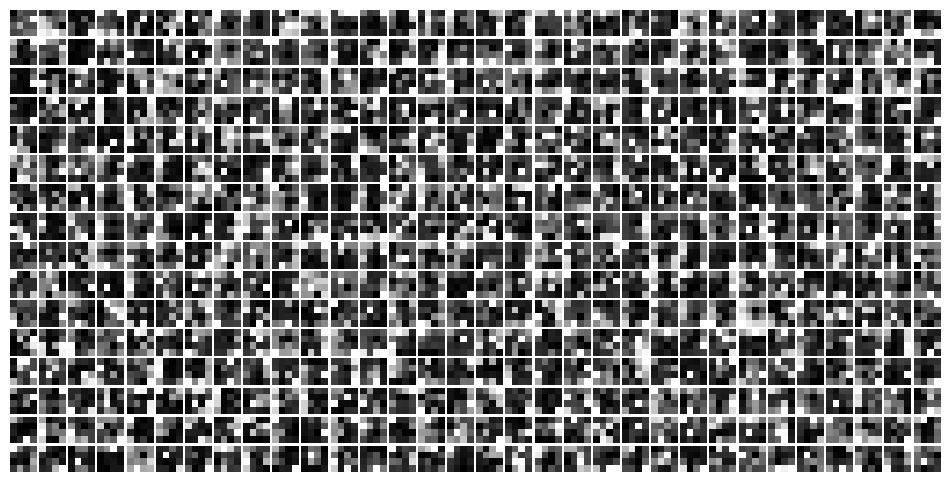

In [96]:
# Tenth layer
activations_np = activations[9].squeeze().detach().cpu().numpy()

# Calculate the number of rows and columns in the grid
num_rows = 16
num_cols = 32

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Iterate through the activation maps and plot them in the subplots
for i, activation_map in enumerate(activations_np):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(activation_map, cmap='gray')
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# Save image
plt.savefig("activation_map_10")
# Show the plot
plt.show()

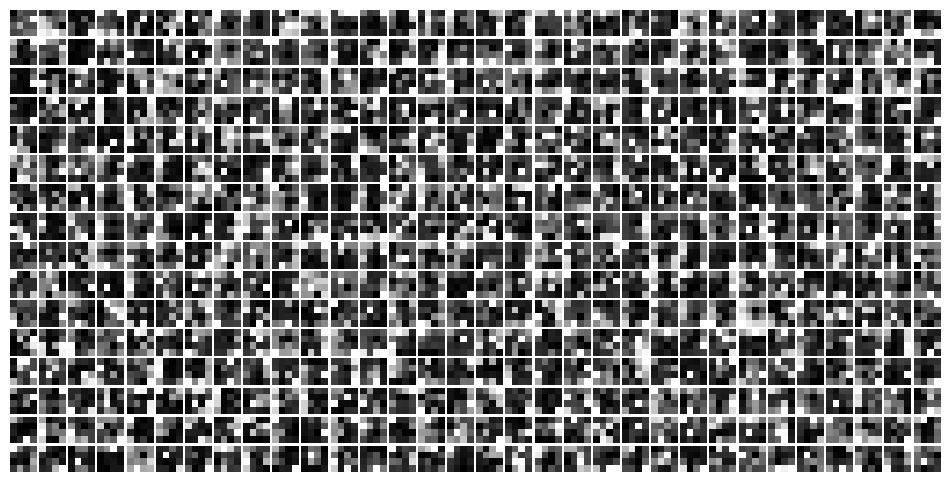

In [97]:
# Eleventh layer
activations_np = activations[9].squeeze().detach().cpu().numpy()

# Calculate the number of rows and columns in the grid
num_rows = 16
num_cols = 32

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

# Iterate through the activation maps and plot them in the subplots
for i, activation_map in enumerate(activations_np):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.imshow(activation_map, cmap='gray')
    ax.axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# Save image
plt.savefig("activation_map_11")
# Show the plot
plt.show()

In [104]:
print(activations[11])
print(activations[12])




tensor([[[[0.1944]]]], grad_fn=<MkldnnConvolutionBackward0>)
tensor([[[[0.5484]]]], grad_fn=<SigmoidBackward0>)


In [105]:
# Generator Code

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.layers = nn.Sequential(
            # input is Z, going into a convolution
            nn.ConvTranspose2d( 100, 64 * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(64 * 8),
            nn.ReLU(True),
            # state size. ``(64*8) x 4 x 4``
            nn.ConvTranspose2d(64 * 8, 64 * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64 * 4),
            nn.ReLU(True),
            # state size. ``(64*4) x 8 x 8``
            nn.ConvTranspose2d( 64 * 4, 64 * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            # state size. ``(64*2) x 16 x 16``
            nn.ConvTranspose2d( 64 * 2, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            # state size. ``(64) x 32 x 32``
            nn.ConvTranspose2d( 64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
            # state size. ``(3) x 64 x 64``
        )

    def forward(self, input):
        return self.layers(input)

In [106]:
# Load the saved weights
weights_path = 'generator.pth'
weights = torch.load(weights_path)

# Create an instance of your discriminator model
generator = Generator(ngpu)  # Replace `ngpu` with the number of GPUs used in your training

# Load the weights into the discriminator model
generator.load_state_dict(weights)

# Set the discriminator to evaluation mode
generator.eval()

Generator(
  (layers): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )


tensor([[[[0.0119]]]], grad_fn=<SigmoidBackward0>)


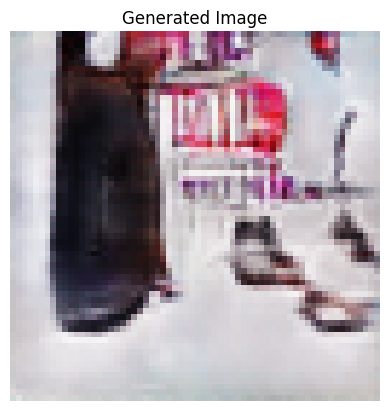

In [117]:
import torch
import matplotlib.pyplot as plt

# Set the generator to evaluation mode

# Generate a random noise vector
noise = torch.randn(1, 100, 1, 1)  # Adjust the dimensions according to generator's input shape

# Generate an image using the generator
with torch.no_grad():
    generated_image = generator(noise)

gi=generated_image
generated_activations = []
for module in discriminator.layers:
    gi = module(gi)
    generated_activations.append(gi)
print(generated_activations[12])

# Convert the generated image tensor to a NumPy array
generated_image = generated_image.squeeze().detach().cpu().numpy()

# Denormalize the image (from range [-1, 1] to [0, 1])
generated_image = (generated_image + 1) / 2.0

# Transpose the image array from (channels, height, width) to (height, width, channels)
generated_image = generated_image.transpose((1, 2, 0))

# Plot and display the generated image
plt.imshow(generated_image)
plt.title("Generated Image")
plt.axis("off")
plt.show()
